# Predictive Maintenance

## Data Set Information:

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of our knowledge.

## Attribute Information:

The dataset consists of 10 000 data points stored as rows with 14 features in columns


UID: unique identifier ranging from 1 to 10000

product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as 

product quality variants and a variant-specific serial number

air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise

torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.

tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

### The machine failure consists of five independent failure modes

tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tool's rotational speed is below 1380 rpm. This is the case for 115 data points.

power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.

overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")

Setup Complete


In [9]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [11]:
df.isna().sum()/len(df)

UDI                        0.0
Product ID                 0.0
Type                       0.0
Air temperature [K]        0.0
Process temperature [K]    0.0
Rotational speed [rpm]     0.0
Torque [Nm]                0.0
Tool wear [min]            0.0
Machine failure            0.0
TWF                        0.0
HDF                        0.0
PWF                        0.0
OSF                        0.0
RNF                        0.0
dtype: float64

- no missing values

In [12]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Let's create a type of failure feature by combining TWF, HDF, PWF, OSF, RNF.
we can use this a target variable for our classification problem.

In [13]:

def type_of_failure(row_name):
    if df.loc[row_name, 'TWF'] == 1:
        df.loc[row_name, 'type_of_failure'] = 'TWF'
    elif df.loc[row_name, 'HDF'] == 1:
        df.loc[row_name, 'type_of_failure'] = 'HDF'
    elif df.loc[row_name, 'PWF'] == 1:
        df.loc[row_name, 'type_of_failure'] = 'PWF'
    elif df.loc[row_name, 'OSF'] == 1:
        df.loc[row_name, 'type_of_failure'] = 'OSF'
    elif df.loc[row_name, 'RNF'] == 1:
        df.loc[row_name, 'type_of_failure'] = 'RNF'

df.apply(lambda row: type_of_failure(row.name), axis=1)
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,type_of_failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,NaN
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,NaN
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,NaN
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,NaN
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,NaN
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,NaN
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,NaN
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,NaN


In [14]:
df.loc[df['type_of_failure'].notnull()]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,type_of_failure
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0,PWF
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0,PWF
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0,TWF
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0,OSF
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0,OSF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0,TWF
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0,PWF
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0,OSF
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0,OSF


In [15]:
df['type_of_failure'].replace(np.NaN, 'no failure', inplace=True)
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,type_of_failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,no failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,no failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,no failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,no failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,no failure


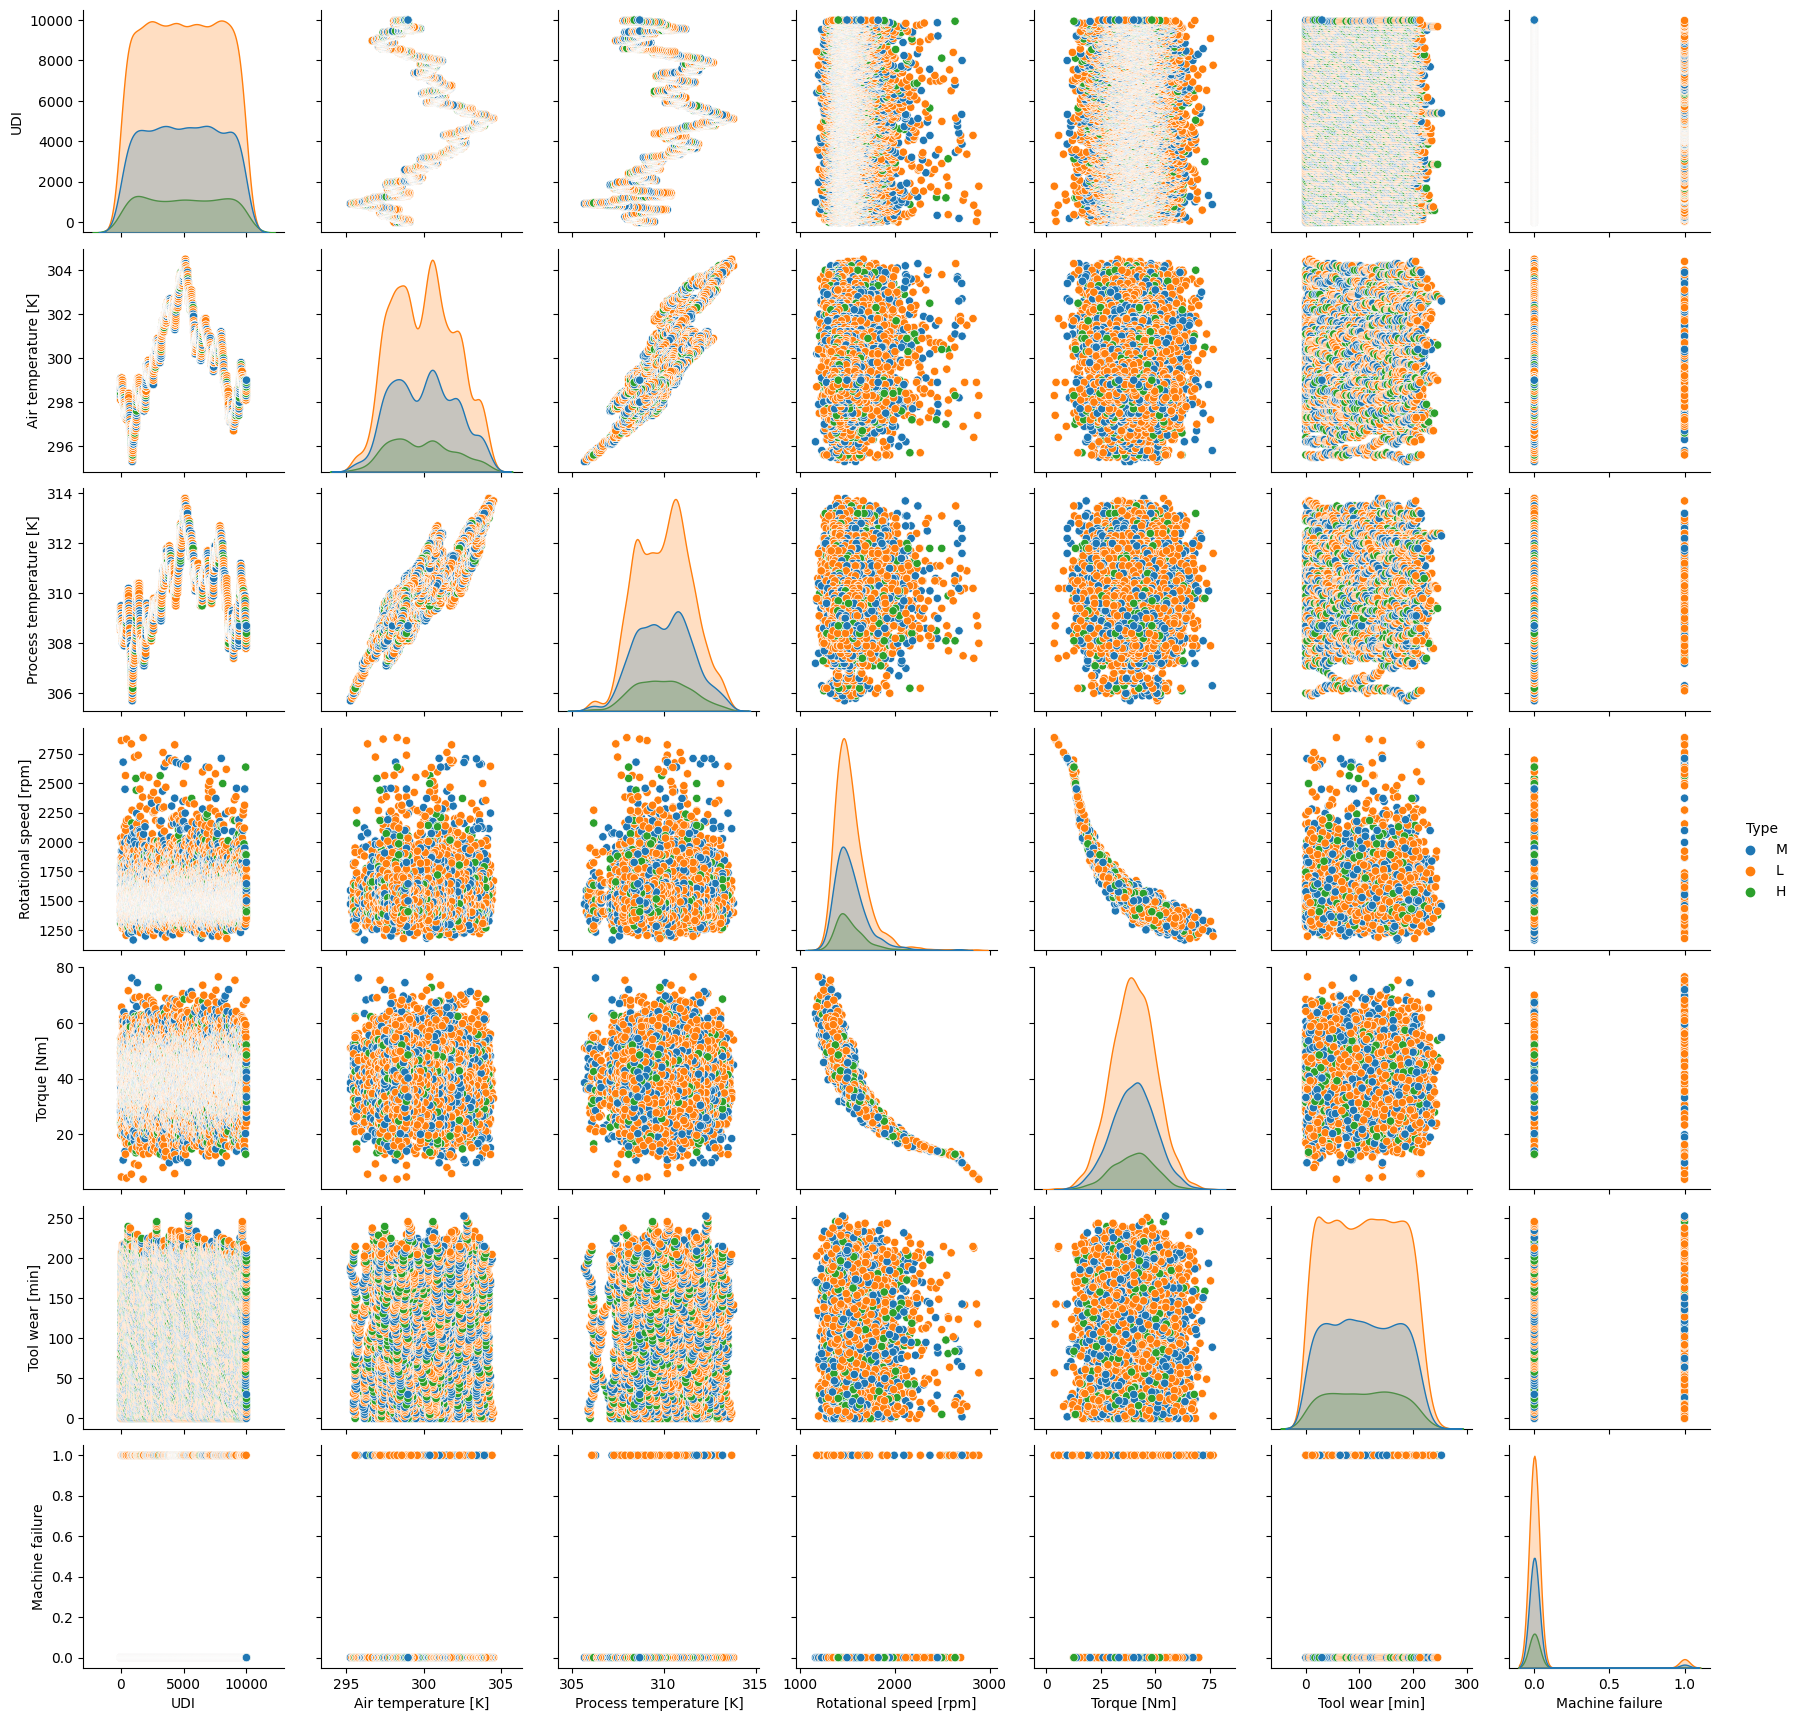

In [16]:
sns.pairplot(df, hue='Type')

## EDA questions

1. What is the distribution of the 'machine failure' label in the dataset? How many instances have failed and how many have not failed?

2. What is the distribution of the 'productID' variable in the dataset? How many instances are of low, medium, and high quality variants?

3. What is the range of values for the continuous variables 'air temperature', 'process temperature', 'rotational speed', 'torque', and 'tool wear'? Are there any outliers in the dataset?

4. Is there any correlation between the continuous variables and the 'machine failure' label? For example, does the tool wear increase the likelihood of machine failure?

5. Is there any correlation between the categorical variable 'productID' and the continuous variables? For example, is the 'rotational speed' higher for high-quality products than for low-quality products?

6. Are there any interactions or non-linear relationships between the variables that may be relevant for predictive maintenance? For example, does the torque increase exponentially with the rotational speed?


### Question 1
What is the distribution of the 'machine failure' label in the dataset? How many instances have failed and how many have not failed?

<Axes: xlabel='type_of_failure', ylabel='count'>

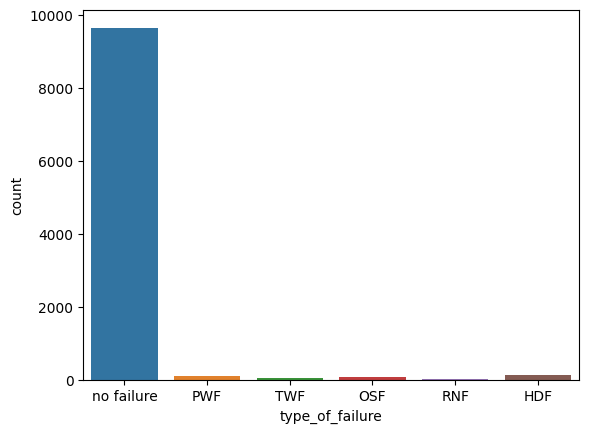

In [17]:
sns.countplot(x='type_of_failure', data=df)


In [18]:
df['type_of_failure'].value_counts()/len(df)*100

type_of_failure
no failure    96.52
HDF            1.15
PWF            0.91
OSF            0.78
TWF            0.46
RNF            0.18
Name: count, dtype: float64

The success rate of the machine is 96.52% and the highest type of failure is HDF(Heat Dissipation Failure) with 1.15% failure rate.

### Question 2
What is the distribution of the 'productID' variable in the dataset? How many instances are of low, medium, and high quality variants?

<Axes: xlabel='Type', ylabel='count'>

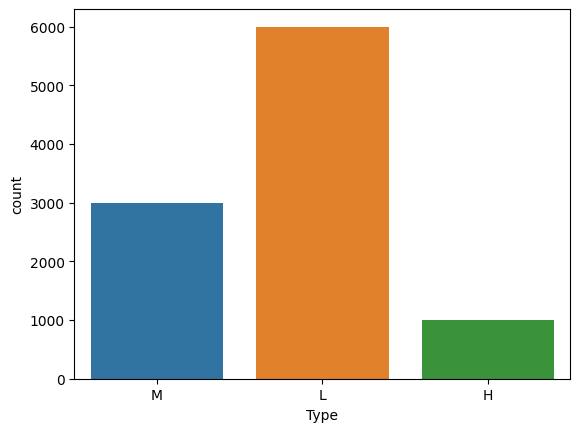

In [19]:
sns.countplot(x='Type', data=df)

In [20]:
df['Type'].value_counts()/len(df)*100

Type
L    60.00
M    29.97
H    10.03
Name: count, dtype: float64

low quality varient makes up majority of the dataset with 60% of the data, followed by medium quality varient with 30% and high quality varient with 10%.

### Question 3
What is the range of values for the continuous variables 'air temperature', 'process temperature', 'rotational speed', 'torque', and 'tool wear'? Are there any outliers in the dataset?

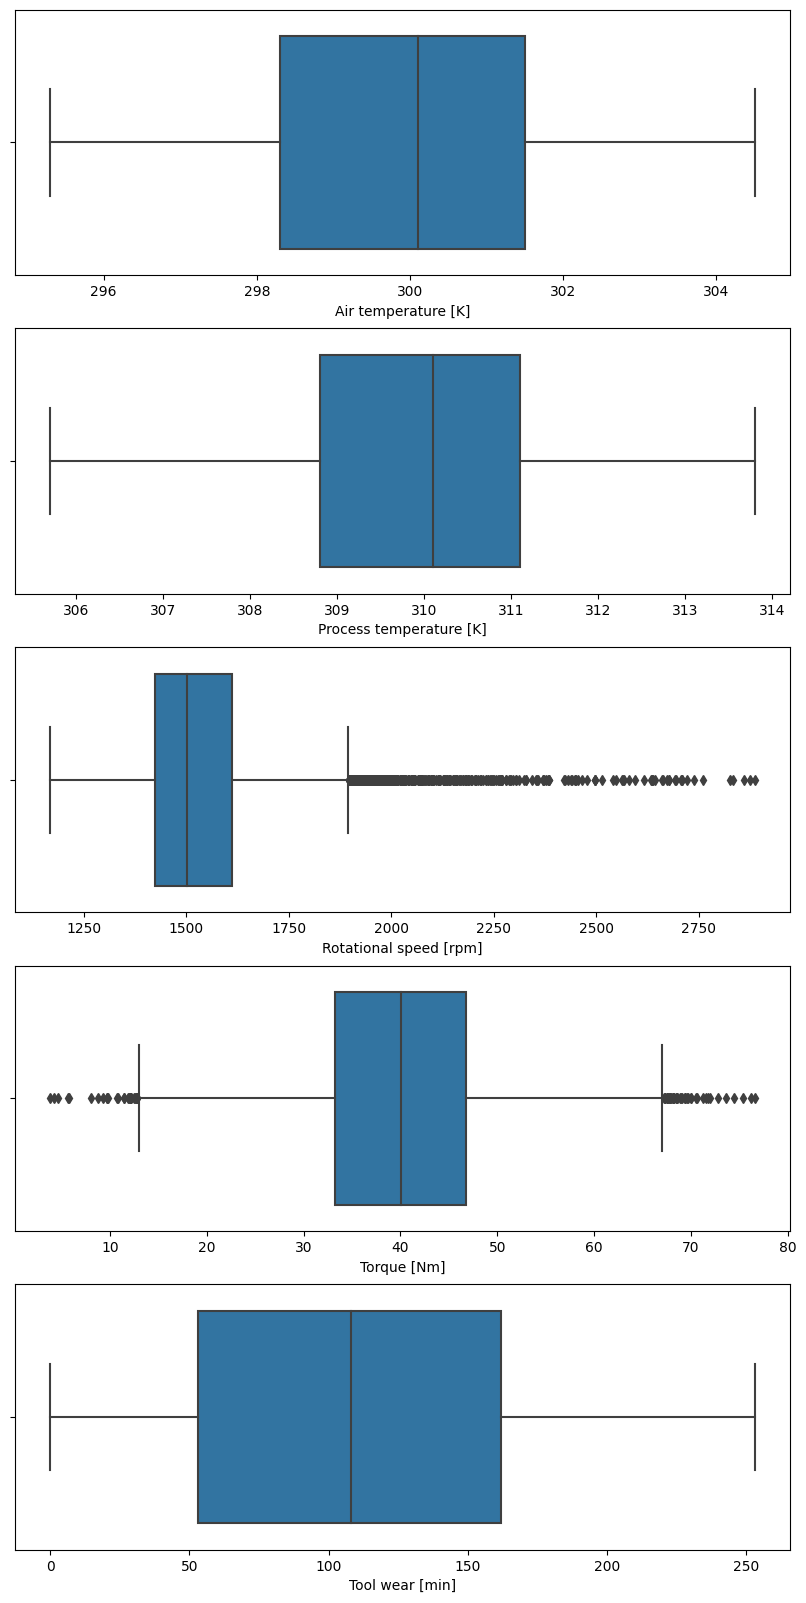

In [21]:
num_cols = ['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']

fig, axes = plt.subplots(5, 1, figsize=(10, 20))

for i, col in enumerate(num_cols):
    sns.boxplot(ax=axes[i], x=df[col])

plt.show()

Torque and rotational speed have outliers in the dataset.

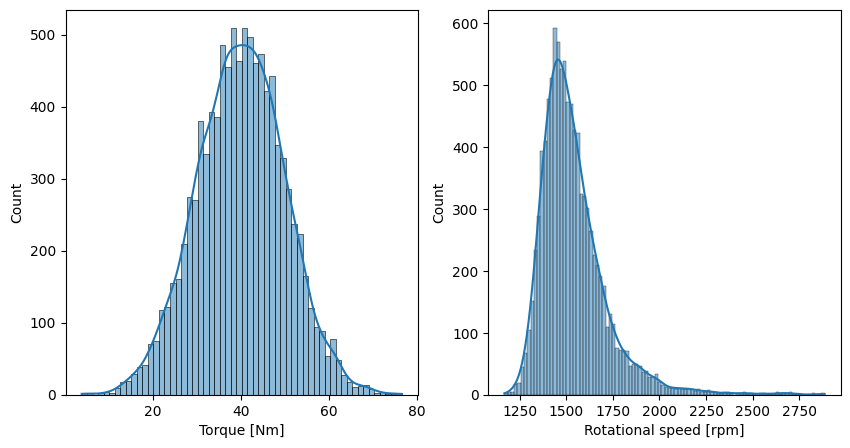

In [22]:
outlier_cols = ['Torque [Nm]', 'Rotational speed [rpm]']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i, col in enumerate(outlier_cols):
    sns.histplot(ax=ax[i], x=df[col], kde=True)

plt.show()


rotational speed may or may not be actual outliers, therefore we'll keep them in the dataset for now.

### Question 4
Is there any correlation between the continuous variables and the 'machine failure' label? For example, does the tool wear increase the likelihood of machine failure?

<Axes: >

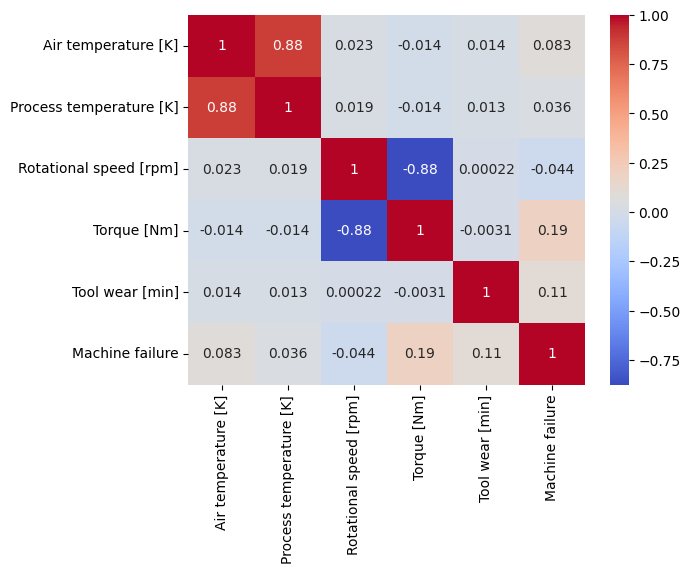

In [23]:
corr_matrix = df[['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]', 'Machine failure']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Null Hypothesis: There is no signifcant relationship between the different columns and Machine Failure. 

Alternate Hypothesis: There is a significant relationship between the tool wear and the machine failure label.

In [24]:
from scipy.stats import ttest_ind

test_cols = ['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']
values = []

for col in test_cols:
    failed = df[df['Machine failure'] == 1][col]
    non_failed = df[df['Machine failure'] == 0][col]

    t, p = ttest_ind(failed, non_failed)
    values.append([t, p])

values = pd.DataFrame(values, columns=['test-statistic', 'p-value'], index=test_cols)
alpha = 0.05
values['Hypothesis'] = values['p-value'].apply(lambda p: 'Reject null hypothesis' if p < alpha else 'Accept null hypothesis')
values

,test-statistic,p-value,Hypothesis
Air temperature [K],8.283018,1.354800e-16,Reject null hypothesis
Process temperature [K],3.596562,3.240058e-04,Reject null hypothesis
Rotational speed [rpm],-4.422634,9.853543e-06,Reject null hypothesis
Torque [Nm],19.490196,4.573805e-83,Reject null hypothesis
Tool wear [min],10.602881,3.976076e-26,Reject null hypothesis


### Question 5
Is there any correlation between the categorical variable 'productID' and the continuous variables? For example, is the 'rotational speed' higher for high-quality products than for low-quality products?

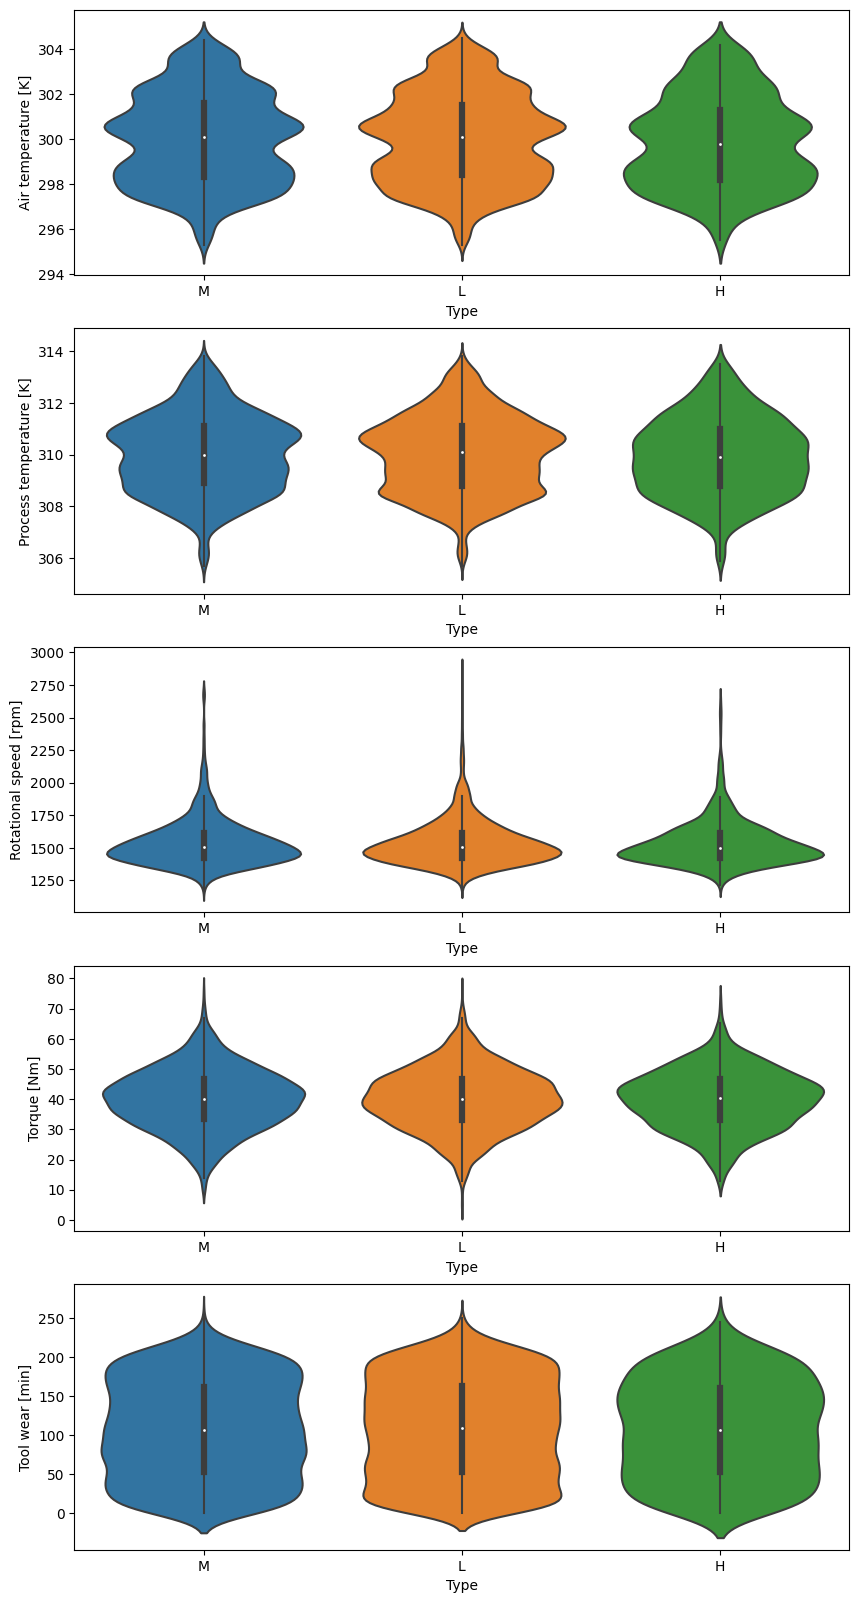

In [25]:
num_cols = ['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']

fig, ax = plt.subplots(5, 1, figsize=(10, 20))


for i, col in enumerate(num_cols):
    sns.violinplot(x='Type', y=col, data=df, ax=ax[i])

plt.show()


Process Temperature seems to have an effect on high quality variant machines. Therefore we can say that Process Temperature is correlated with machine type.

### Question 6
Are there any interactions or non-linear relationships between the variables that may be relevant for predictive maintenance? For example, does the torque increase exponentially with the rotational speed?

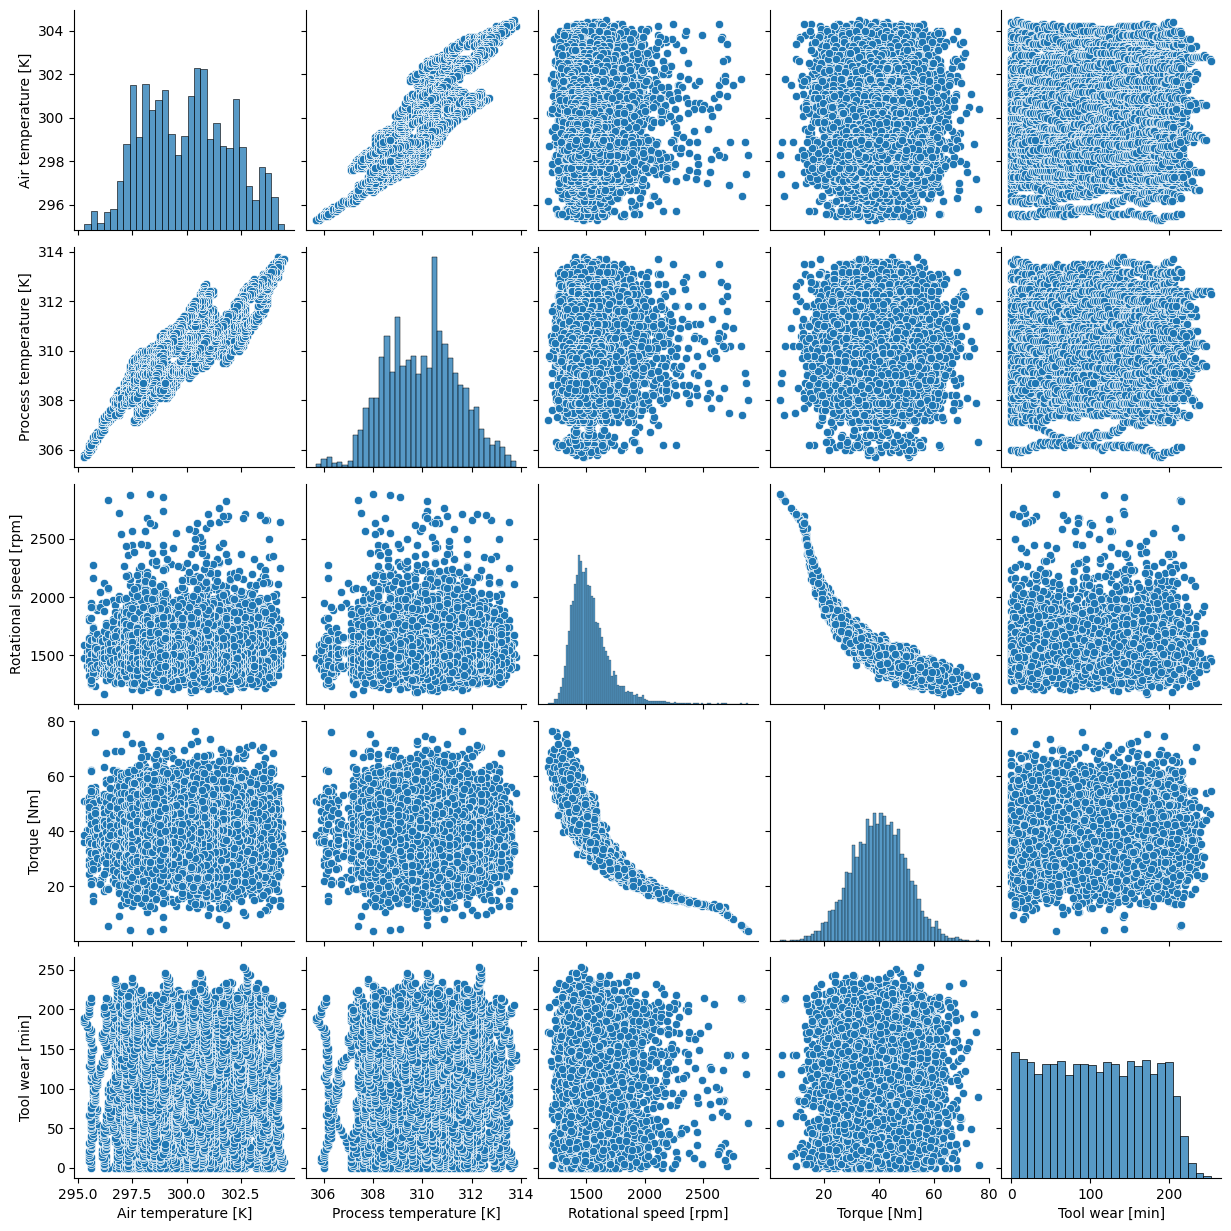

In [26]:
num_cols = df[['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']]
sns.pairplot(num_cols)



Among all possible combinations of continuous variables, Rotational Speed vs Torque have a negative correlation and process temperature vs air temperature have a positive correlation.